# CMSC478 Machine Learning - Spring 2022

## Instructor: Fereydoon Vafaei

### <font color="blue">Assignment-1: Binary Classification with Imbalanced Dataset - Stroke Prediction</font>

Benjamin Thai MX08618

## Overview, Policies, and Learning Objectives

So far, you've learned very important fundamental concepts in Machine Learning such as supervised learning (e.g. classification and regression) vs unsupervised learning (e.g. clustering), overfitting, model evaluation, and performance measures (accuracy, precision, recall, AUC, MSE, etc.). You've learned that two of the most common approaches in supervised learning are regression and classification. In this assignment, you are going to practice what you've learned so far by building ML models and applying them on data.

The ML task in this assignment is binary classification, stroke prediction, based on multiple features such as presence of heart disease, hypertension, BMI, etc. 

<b>Very Important Note:</b> Read ALL the instructions in this notebook very carefully. **Wherever the documentation link is provided, click on the links and read the documentation!** Careless reading and skipping instructions are major sources of making mistakes and losing points in your assignments. Also note that this assignment has three parts and includes multiple steps and questions. You're strongly recommended to get started early and plan to finish well before the due date. Technical problems or other issues/questions on the due date or just a day before would NOT be accepted as an excuse for extension.

<b>Course Policy Reminder</b>
Debugging the codes and error resolution are ALWAYS the students' responsbility regardless of the source or the cause of the error. This policy will be enforced in email communications and the office hours. Keep in mind that all assignments are individual graded tasks. Any collaboration with other students is strictly prohibited and is considered as cheating. Students should NOT share any answer, solution, or code with other students. Violations of these policies would be penalized according to UMBC academic integrity policy.

**You must run ALL cells** and get the correct outputs for all cells and give complete answers to all questions. **Cells/codes with no output get zero!**

Follow the instructions for each step very carefully.

Wherever needed, you should replace `...` elipsis with your code.

`...` may indicate one or more lines of missing codes. Some outputs are provided to you to use as reference and to verify that your output is correct.

**Preprocessing Effect on Grade**: Preprocessing steps are so critical in each part and you should pay special attention to make sure that you do all preprocessing steps correctly. That is why the reference outputs have been provided in preprocessing steps. Your notebook would become ineligible for grading implementation parts if you have wrong results/outputs of preprocessing, so be extremely careful with all preprocessing steps. 

Pedagogically, this assignment will help you:
- better understand the concepts you learned and how to use ML methods in practice. 
- learn how to work with ML libraries: Scikit-learn and XGBoost
- practice reading documentation. This is a very important skill in ML/Data Science collaborative environments and teams.

## Installing XGBoost

You should install [XGBoost](https://xgboost.readthedocs.io/en/latest/install.html) for this assignment. Read the Installation Guide and follow the instructions. Running `pip install xgboost` command in the Anaconda command prompt should work for most platforms but **you are responsible for proper installation and resolving any issues that may arise in the installation process**. XGBoost is an efficient algorithm from the category of ensemble methods, i.e. a collection of predictors that work collaboratively to make predictions. You'll learn about ensemble methods more in the upcoming contents of this course.

## Import Cell

Import all necessary python, sklearn and xgboost modules in the following cell. **You definitely need to add to the imports as you work on the assignment.** When you import a new module, add it here in the same cell. All imports should be in this import cell.

In [38]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

## Part-I - Preprocessing

Download the [Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset). Read the feature specifications in Kaggle page to learn more about the data. The target label is `stroke` which has two labels {0,1} representing: 1 if the patient had a stroke or 0 if not.

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

You should save and extract the dataset `healthcare-dataset-stroke-data.csv` in the same working directory as your notebook. Next, you should load the data using `pandas`. Read pandas documentation to learn more about it [here](https://pandas.pydata.org/docs/user_guide/10min.html#min)

> Load the `healthcare-dataset-stroke-data.csv` dataset using pandas [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method.

In [2]:
# Load the data
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Print data shape
display(data.shape)
# Show the first five rows
display(data.head(5))

(5110, 12)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


> Let's see what the type of `data` is.

In [3]:
type(data)

pandas.core.frame.DataFrame

[`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) is a data structure that contains datasets in pandas. Since this is a binary classification (supervised learning) ML model, you have both the features and the labels for training and testing, and everything has been stored in `data` DataFrame. 

> `id` column does not provide any useful information for classification, so drop it.

In [4]:
# Drop id column
data = data.drop(columns="id")

# Print data shape
display(data.shape)

# Show the first five rows
display(data.head(5))

(5110, 11)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


> Next, get some insights about `data` by using `.info()` and `.describe()` methods.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


> Next, you should show that the data is highly imbalanced between the two classes. You must use [`pie`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) plot from `matplotlib`. See [examples](https://matplotlib.org/stable/gallery/index.html#pie-and-polar-charts) and read documentation carefully. Your plot should PRECISELY match with the provided pie chart; otherwise it gets zero.

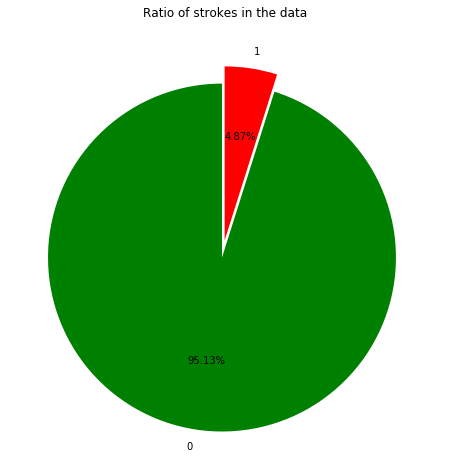

In [7]:
''' Plot a pie chart that shows the imbalanced distribution of the two classes for stroke {0,1} [10 points]

The plot plt.figure should have a figsize=(8,8)

The pie plot should have the following parameter settings:
explode = (0.1,0), 
autopct='%1.2f%%', 
shadow=False,
startangle=90

NOTE: The pie plot should get the ratios from data (NO HARDCODING),
and should precisely match with the provided plot below with title and all settings;
otherwise it gets zero.
'''

labels = (data["stroke"].value_counts(normalize=True)*100).index
ratio = data["stroke"].value_counts(normalize=True)*100
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(ratio, labels=labels, explode=(0.1,0), autopct='%1.2f%%', shadow=False, startangle=90, colors=["g","r"])
ax1.set_title("Ratio of strokes in the data")
plt.show()


>You should always check whether your dataset contains `NA` values and decide what to do about it. [`.isna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) method followed by [`.sum()`](https://cmdlinetips.com/2020/11/how-to-get-number-of-missing-values-in-each-column-in-pandas/) method can generate good reports for na values.

In [8]:
# Check if there is any na values in data
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

> The easiest way to get rid of `NA`s is to drop them, although there are sometimes better alternatives. However, since this is a highly imbalanced dataset, you should be careful about the distribution of `NA`s in each class. Let's check which class holds the majority of na values. First, split the `data` to two separate dataframes `positive` and `negative` based on `stroke` labels.

In [9]:
positive = data[data["stroke"] == 1]
negative = data[data["stroke"] == 0]

In [10]:
# Now, positive should contain only the rows with: stroke == 1
positive

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


In [11]:
# negative should contain only the rows with: stroke == 0
negative

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [12]:
# check na for positive
positive.isna().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  40
smoking_status        0
stroke                0
dtype: int64

In [13]:
# check na for negative
negative.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  161
smoking_status         0
stroke                 0
dtype: int64

> Ok, it turned out that most na values are in negative class. So, you can drop all `NA`s now.

In [14]:
# Drop na from data
data = data.dropna(axis='index', how='any')

In [15]:
# Double-check that there is no NAs anymore
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

> Next, you should convert all categorical features such as `gender` to numeric. [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) is quite helpful for this conversion.

> **NOTE**: Make sure that all categorical values have been converted to numeric as the following dataframe shows.

In [16]:
#  Using LabelEncoder transform all categorical values to numeric
le = preprocessing.LabelEncoder()
transformed_data = data.apply(LabelEncoder().fit_transform)
# Show the first 10 rows of transformed_data
transformed_data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3734,239,1,1
2,1,101,0,1,1,2,0,2429,198,2,1
3,0,70,0,0,1,2,1,3309,217,3,1
4,0,100,1,0,1,3,0,3318,113,2,1
5,1,102,0,0,1,2,1,3367,163,1,1
6,1,95,1,1,1,2,0,579,147,2,1
7,0,90,0,0,0,2,1,1910,101,2,1
9,0,99,0,0,1,2,1,124,115,0,1
10,0,102,1,0,1,2,0,1140,170,2,1
11,0,82,0,1,1,0,0,2864,241,3,1


> Next, you should separate `X` (features) from `y` (labels).

In [17]:
# Get feature vector X (all columns but "stroke") and target label y as "stroke"; y should contain stroke only
X = transformed_data.drop('stroke', axis="columns") 
y = transformed_data['stroke']

# Print X,y shapes
print(X.shape)
print(y.shape)
# Show the first five rows of X
X.head(5)

(4909, 10)
(4909,)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,88,0,1,1,2,1,3734,239,1
2,1,101,0,1,1,2,0,2429,198,2
3,0,70,0,0,1,2,1,3309,217,3
4,0,100,1,0,1,3,0,3318,113,2
5,1,102,0,0,1,2,1,3367,163,1


In [18]:
# Show the first five rows of y
y.head(5)

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

> As mentioned in the lectures, the data for supervised learning (both classification and regression) is split into training set and test set. We usually do this by using [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) module from scikit-learn.

In [19]:
# Split X,y to train and test with ratio of 70/30 for train/test respectively
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

# Print X_train, y_train, X_test, y_test (in the same order)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3436, 10)
(3436,)
(1473, 10)
(1473,)


## Part-II Binary Classification with Random Forest and XGBoost

Now that the data is prepared, you can train and test classifiers for binary classification. You are going to use Random Forest and XGBoost classifiers. Both of these classifiers are commonly used in ML projects and every ML engineer or Data Scientist should know how to work with them.

Note that we use [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.fit) method applied on `(X_train, y_train)` for training and [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict) method applied on `(X_test)` without showing the lables `y_test` for making predictions (testing). Click on the methods and read their sklearn documentation for further information. XGBoost documentation for [`.fit()`](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.dask.DaskXGBRanker.fit) and [`.predict()`](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.dask.DaskXGBRanker.predict) methods suggests that their usage is similar to sklearn. You should also check the textbook codes in Chapter-3 and the supplementary materials (Jupyter Notebooks) to learn more.

In [90]:
# Create an rf classifier and train it on (X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [91]:
# Test rf on X_test
rf_predictions = rf.predict(X_test)

In [92]:
# Print confusion matrix for rf
rf_matrix = confusion_matrix(y_test, rf_predictions, labels=[1,0]).T
print('Random Forest confusion matrix: \n {}'.format(rf_matrix))

Random Forest confusion matrix: 
 [[   1    1]
 [  67 1404]]


In [93]:
# Compute the accuracy score for rf
rf_acc = accuracy_score(y_test, rf_predictions)
print('Random Forest accuracy: ', rf_acc)

Random Forest accuracy:  0.9538357094365241


> It looks like the `rf` has a high accuracy, but be careful before making conclusions as the data is highly imbalanced! Let's get the [Balanced Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html) to get better insight about the `rf` classifier performance.

In [94]:
# Compute the balanced accuracy score for rf
rf_bal_acc = balanced_accuracy_score(y_test, rf_predictions)
print('Random Forest balanced accuracy: ', rf_bal_acc)

Random Forest balanced accuracy:  0.5069970692903496


> Next, get [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for `rf`.

In [95]:
# Get classification_report for rf
# Note: you should put one line inside print
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1405
           1       0.50      0.01      0.03        68

    accuracy                           0.95      1473
   macro avg       0.73      0.51      0.50      1473
weighted avg       0.93      0.95      0.93      1473



> Next, train and test XGBoost classifier.

In [96]:
# Train and test XGBoost, ignore the version warning if any
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_predictions = xgb.predict(X_test)

[17:32:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\benth\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [97]:
# Compute the accuracy and confusion matrix for xgb
xgb_acc = accuracy_score(y_test, xgb_predictions)
print('XGBoost accuracy: ', xgb_acc)
xgb_matrix = confusion_matrix(y_test, xgb_predictions, labels=[1,0]).T
print('XGBoost confusion matrix: \n {}'.format(xgb_matrix))

XGBoost accuracy:  0.9456890699253224
XGBoost confusion matrix: 
 [[   4   16]
 [  64 1389]]


In [98]:
# Compute the balanced accuracy for xgb
xgb_bal_acc = balanced_accuracy_score(y_test, xgb_predictions)
print('XGBoost accuracy: ', xgb_bal_acc)

XGBoost accuracy:  0.5237178145279464


In [99]:
# Get classification_report for xgb
print(classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1405
           1       0.20      0.06      0.09        68

    accuracy                           0.95      1473
   macro avg       0.58      0.52      0.53      1473
weighted avg       0.92      0.95      0.93      1473



In [100]:
# Compute and print precision and recall scores for rf and xgb
print('RF precision = ', precision_score(y_test, rf_predictions, pos_label=1))
print('XGBoost precision = ', precision_score(y_test, xgb_predictions, pos_label=1))
print('RF recall = ', recall_score(y_test, rf_predictions, pos_label=1))
print('XGBoost recall = ', recall_score(y_test, xgb_predictions, pos_label=1))

RF precision =  0.5
XGBoost precision =  0.2
RF recall =  0.014705882352941176
XGBoost recall =  0.058823529411764705


### Part-II Questions

- **Q1** [8 points] - Check sklearn documentation for [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and specify the number of True Positives (TP), True Negatives (TN), False Positives (FP) and False Negatives (FN) for Random Forest and XGBoost classifiers.

In [101]:
tn, fp, fn, tp = confusion_matrix(y_test, rf_predictions).ravel()
print('TP = ', tp)
print('TN = ', tn)
print('FP = ', fp)
print('FN = ', fn)

TP =  1
TN =  1404
FP =  1
FN =  67


In [102]:
tn, fp, fn, tp = confusion_matrix(y_test, xgb_predictions).ravel()
print('TP = ', tp)
print('TN = ', tn)
print('FP = ', fp)
print('FN = ', fn)

TP =  4
TN =  1389
FP =  16
FN =  64


- **Q2** [2 points] - Why don't you include `y_test` when you apply `.predict()` method on `X_test`?

ANSWER:
We don't include y_test because we want the model to make predictions without it being given the true values. This way the true values are not leaked to the model and we can more accurately evaluate its real world performance when its trying to predict on new data with no given truth values. 

- **Q3** [10 points]
    - (a) Based on the balanced accuracy, classification report, precision and recall scores, how do you evaluate the performance of `rf` and `xgb` classifiers for this problem?(4 points)
    
    - (b) Is accuracy a good indicator of classifier performance for this problem? Why? (2 points)

    - (c) What would you do to improve the results for this imbalanced dataset?(4 points) 

ANSWER: EXPLAIN COMPLETELY for (a), (b) and (c). Incomplete answers will get zero.

(a) 

In terms of balanced accuracy xgb seems to come out ever so slightly ahead compared to random forest with a score of .523 vs .506. 

Due to the imbalanced data the weighted avg in the classification report isn't a good metric to look at as the class with the much larger number of entries will have a bigger weight and overpower the weight for the class with fewer samples. looking at the macro averages of the classification report which isn't weighted, shows the xgb model has a precision, recall, and f1 score of .58, .52, and .53, respectively. where as the rf model has a precision, recall, and f1 score of .73, .51, .50, respectively. 

The precision and recall scores function show the xgb model has a precision and recall of 0.2, and 0.058, respectively. and the rf model has a precision and recall of .5, and .014, respectively.

How you use all these scores to determine the performance of the model depends on the context of the problem you're trying to solve. In our case, we are trying to predict if class is a stroke or not a stroke. With this context in mind, we could argue that this model could be used in a medical diagnostic setting. In this setting we would want as little false negatives as possible, as it is very undesirable in a medical diagnostic context. To achieve this we would want a higher recall, because the higher the recall the lower the number of false negatives there are. The xbg model has a higher recall so in this context the xgb model will most likely perform better than the rf model. Also the high precision score of the rf model gives the opposite effect that we are looking for, due to the precision and recall trade off. the higher the precision the lower the recall and vise versa. In the medical diagnostic context, we want a high recall so the rf model having a higher precision of .5 has the opposite effect of what we want, making the model have a higher chance at producing a higher number of false negatives compared to the xgb model. This is reflected when we print the number of tp, tn, fp, fn from the confusion matrix. and you can see that the rf model has a higher amount of false negatives than the xgb model.

Now if you wanted your model to produce as little false positives as possible then the random forest model would suit your needs better as the higher percision of .5 of that model will give you a lower amount of false positives.

If your needs called for more of a balance between both recall and precision then the f1 score would be a better metric to look at. In our case the xgb model ended up having a higher f1 score of .09 compared to rf models's .03 for our positive class 1. and xgb's macro avg was also higher by 3. So according the f1 score, the xgb model would likely perform slightly better than the rf model.    

Due to the imbalanced nature of the data set accuracy isn't the besst metric to use, Balanced accuracy trys to account for that and in this case xgb seems to come out slightly ahead so if you were to use balanced accuracy as your performance measure the xgb may have the better model performance.   

(b)  

No accuracy is not a good indicator due to the imbalanced data, because of this it not the best performance measure to evaluate these two models with. 

From our preprossesing stage we know we have a lot of negative samples and very few positive samples. when the data is skewed like this its easy for the larger number of negative data points to over power the lesser positive data points and make accuracy appear to be higher then it is. say we have 10,000 negative points and 1,000 positive, If The model predicted all of the points being negative the accuracy will be 90% but the model would have predicted all the positive cases wrongly. And would not be a good metric it telling us how well our model performs when predicting positive cases. So accuracy in a imbalanced data set can be deceiving.

(c) 

The biggest thing that would help is adding more positive stroke data samples to balance out the data. also If we are using this model in a medical diagnostic context to diagnose strokes then I would try to adjust hyper parameters to try to increase recall, since high recall helps lower the amount of false negatives, as false negatives are very undesirable in a medical diagnostic context. We could use hyperparameter optimization algorithms like grid search to help us with this. We could also possibly try other types of models if they exist, that may perform better on imbalanced data sets than rf or xbg would.

## Part-III Hyperparameter Tuning, Grid Search, and ROC Curves

Next, you're going to tune the hyperparameters of the random forest classifier to check whether it can improve the results. You should use [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) which tries different combinations of hyperparameter values to find the best values. Read the documentation to learn more. There is also an example in Chapter-2 of the textbook (page 76) that you should read. Running this part may take a while (**depending on your computer speed it may take more than an hour**).

> `param_grid` argument of `GridSearchCV` is a dictionary that contains the hyperparameters and their corresponding values that you should include in your search. Other than the `param_grid`, you can use the default arguments of `GridSearchCV`. You may want to set `verbose=True` to get more info in the output.

> **The minimum requirement** for this part of the assignment is that you should try the following hyperparameters, each with at least two values:
`n_estimators, criterion, bootstrap, max_depth, max_features, min_samples_leaf, min_samples_split`

In [32]:
# Perform a GridSearch on rf hyperparameters [10 points]
rf_clf = RandomForestClassifier()
param_grid =  {
    'n_estimators': [3, 10, 30, 50, 100],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [False, True],
    'max_depth': [None, 10, 30, 50, 100],
    'max_features': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 10, 30, 50, 100],
    'min_samples_split': [2, 10,30, 50, 100]
}

grid_search = GridSearchCV(rf_clf, param_grid, n_jobs= -1, verbose=True)
best_rf_clf = grid_search.fit(X_train, y_train)
print('Grid search for hyperparameter tuning of random forest classifier')
print('Best Parameters: ' + str(best_rf_clf.best_params_))

Fitting 5 folds for each of 12500 candidates, totalling 62500 fits
Grid search for hyperparameter tuning of random forest classifier
Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 30, 'n_estimators': 100}


In [143]:
best_rf = best_rf_clf.best_estimator_
print(best_rf)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features=6,
                       min_samples_split=30)


In [144]:
# Train and test best_rf
best_rf.fit(X_train, y_train)
best_rf_predictions = best_rf.predict(X_test)

In [145]:
# Compute and print the accuracy, balanced accuracy, precision, recall and confusion matrix of best_rf
best_rf_acc = accuracy_score(y_test, best_rf_predictions)
best_rf_bal_acc = balanced_accuracy_score(y_test, best_rf_predictions)
best_rf_precision = precision_score(y_test, best_rf_predictions, pos_label=1)
best_rf_recall = recall_score(y_test, best_rf_predictions, pos_label=1)
best_rf_matrix = confusion_matrix(y_test, best_rf_predictions, labels=[1,0]).T
print('Best RF Accuracy: ', best_rf_acc)
print('Best RF Balanced Accuracy: ', best_rf_bal_acc)
print('Best RF Precision: ', best_rf_precision)
print('Best RF Recall: ', best_rf_recall)
print('Best RF confusion matrix: \n {}'.format(best_rf_matrix))

Best RF Accuracy:  0.9524779361846571
Best RF Balanced Accuracy:  0.5202794640988068
Best RF Precision:  0.375
Best RF Recall:  0.04411764705882353
Best RF confusion matrix: 
 [[   3    5]
 [  65 1400]]


> The following cell shows how you can prepare the required scores to plot ROC curve of random forest classifier using `fpr`, `tpr`, and `threshold` returned by [`metrics.roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) and class probabilities using [`predict_proba()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) method of [`RandomForest`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [146]:
# Get class probabilities, fpr, tpr and threshold for Random Forest classifier
rf_probs = best_rf.predict_proba(X_test)
rf_preds = rf_probs[:,1]
rf_fpr, rf_tpr, rf_threshold = metrics.roc_curve(y_test, rf_preds)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)

Text(0.5, 0, 'False Positive Rate')

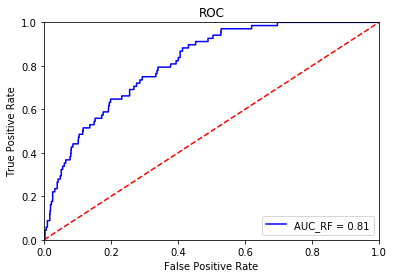

In [150]:
# Plot ROC curve for Random Forest classifier
# Incomplete plots with no title, axis labels or legend get zero
plt.title('ROC')
plt.plot(rf_fpr, rf_tpr, 'b', label = 'AUC_RF = %0.2f' % rf_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

> Next, you should plot ROC curves of BOTH classifiers in one plot. You should first get the probs, preds, fpr, tpr, and threshold for `xgb`. Your plot should be complete and match with the required specifications. A complete plot has title, axis labels and legend.

In [148]:
# Get class probabilities, fpr, tpr and threshold for XGBoost classifier
# Hint: It should be very similar to rf
xgb_probs = xgb.predict_proba(X_test)
xgb_preds = xgb_probs[:,1]
xgb_fpr, xgb_tpr, xgb_threshold = metrics.roc_curve(y_test, xgb_preds)
xgb_roc_auc = metrics.auc(xgb_fpr, xgb_tpr)

Text(0.5, 0, 'False Positive Rate')

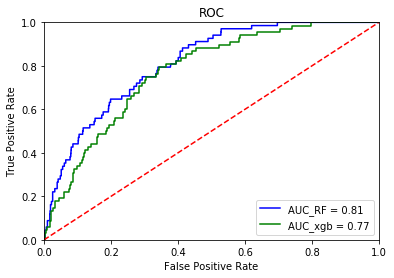

In [151]:
''' Plot ROC for BOTH classifiers rf and xgb with different colors in one plot,
and with AUC scores shown on the 'lower right' of the plot. [10 points]

Write as many number of lines of code as needed.

Hint: You may use Random Forest ROC curve as a reference for writing your code.

Your plot should be complete with title, axis labels and legend.

Incomplete plots get zero.
'''
plt.title('ROC')
plt.plot(rf_fpr, rf_tpr, 'b', label = 'AUC_RF = %0.2f'  % rf_roc_auc)
plt.plot(xgb_fpr, xgb_tpr, 'g', label = 'AUC_xgb = %0.2f'  % xgb_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Part-III Questions

- **Q4** [2 points]- Check the `best_rf` performance scores and explain whether or not fine-tuning hyperparameters using `GridSearch` helped resolve the performance issues with this imablanced dataset. Explain why COMPLETELY. You must justify your answer and make arguments.

ANSWER: 

Fine-tuning the random forest hyperparmeters using grid search seemed to indeed help in slightly improving the performance in  certain aspects. 
Its precision score has been lowered and its not as high as before, and its recall score has been slighly increased as well, meaning that grid search managed to slighly balanced out the precision/recall scores so that the model is not as heavy on the precision as before. This can be further seen in the confusion matrix where there is now less false negatives and more false positives that were predicted due to the increase recall and the lowering of the precision.
What this means is that the fine-tuned model is a bit more useful in other use cases, other than highly favoring the minimization of false positives that the original unoptimized rf model had with its higher precision and lower recall.
This optimized model will likely perform a bit better than the original, In use cases where your not as worried about eliminating and minimizing possible false positives predictions.

The balanced accuracy has also increased from the original model with a balanced accuracy of 0.520. which is more in line with the balance accuracy of the xgb model.


- **Q5** [2 points]- Checking the ROC curves of Random Forest and XGBoost, and without seeing AUC scores, how would you determine which classifier has a better performance? Explain.

ANSWER:

AUC stands for area under the curve. Even without seeing the AUC scores it is easy to see visually which curve has more area under it in the gragh. Essentially the higher and closer the curve is to the top left corner of the graph the more area it has. we can see the AUC_RF curve being higher and closer to the top left corner than the xgb curve. Meaning the AUC score of the rf model is higher than the xgb model.

- **Q6** [2 points]- Based on the ROC curves and auc scores, can you say that these classifiers have a good performance? In other words, is ROC curve a good indicator for classifier performance for this dataset? Justify your answer with clear arguments.

ANSWER: 

Based on the ROC curve and AUC scores, The rf is better performing with a AUC of .81 meaning a 81% chance that the model will be able to distinguish between positive class and negative class. While the xgb model has a AUC score 0f .77. ROC curves are useful in comparing different models on the same problem, and visualizing the performance of the models. According to the graphs our models seem to perform fairly well. But our data set is very imbalanced and while its was able to predict many negative samples correctly, it didn't do to well at predicting positive cases correctly. Maybe the ROC curves and AUC scores can be some what misleading for large imbalances in the data, and the curves maybe some what optimistic in making the model look like its performing better than it could be due to the imbalanced data set.   

## Grading

Assignment-1 has a maximum of 100 points. Make sure that you get the correct outputs for all cells that you implement and give complete answers to all questions. Also, your notebook should be written with no grammatical and spelling errors and should be easy-to-read.

The breakdown of the 100 points is as follows:

- Part-I - Preprocessing: 30 points (pie chart has 10 points) **Note**: Incomplete pie charts get zero.
   

- Part-II - 30 points
    - Implementation and results: 10 points
    - Part-II Questions: 20 points
    

- Part-III - 40 points
    - Implementation, results, and plots: 34 points **Note**: Incomplete GridSearch and/or ROC plots get zero!
    - Part-III Questions: 6 points
    

<b>Note: </b>Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

Grading will be based on: 

  * correct implementation,
  * running ALL cells and correct outputs and plots, (cells with no output get ZERO for the whole part that includes the cell)
  * correct answer to the questions,
  * readability of the notebook.

## Submission

Name your notebook ```Lastname-A1.ipynb```. Submit the completed notebook using the ```Assignment-1``` link on Blackboard.
  
<font color=red><b>Due Date: Thursday Feb 24th, 11:59PM.</b></font>